In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from metrics import *

np.random.seed(42)

# Reading the data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
data = pd.read_csv(url, delim_whitespace=True, header=None,
                 names=["mpg", "cylinders", "displacement", "horsepower", "weight",
                        "acceleration", "model year", "origin", "car name"])

# Clean the above data by removing redundant columns and rows with junk values
# Compare the performance of your model with the decision tree module from scikit learn

C:\Users\Lenova\AppData\Local\Temp\ipykernel_47560\3181560787.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(url, delim_whitespace=True, header=None,


In [25]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [27]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [28]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [29]:
data.drop(['car name','origin','model year'],axis=1,inplace=True)

In [30]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130.0,3504.0,12.0
1,15.0,8,350.0,165.0,3693.0,11.5
2,18.0,8,318.0,150.0,3436.0,11.0
3,16.0,8,304.0,150.0,3433.0,12.0
4,17.0,8,302.0,140.0,3449.0,10.5


In [31]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration
count,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090
std,7.815984,1.701004,104.269838,846.841774,2.757689
min,9.000000,3.000000,68.000000,1613.000000,8.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000
max,46.600000,8.000000,455.000000,5140.000000,24.800000


In [32]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
dtype: object

In [33]:
data['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [34]:
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

In [35]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130.0,3504.0,12.0
1,15.0,8,350.0,165.0,3693.0,11.5
2,18.0,8,318.0,150.0,3436.0,11.0
3,16.0,8,304.0,150.0,3433.0,12.0
4,17.0,8,302.0,140.0,3449.0,10.5
...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6
394,44.0,4,97.0,52.0,2130.0,24.6
395,32.0,4,135.0,84.0,2295.0,11.6
396,28.0,4,120.0,79.0,2625.0,18.6


In [36]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
dtype: object

In [37]:
data['horsepower'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Name: horsepower, Length: 398, dtype: bool

In [38]:
data = data[data['horsepower'].notna()]

In [39]:
data['horsepower'].isnull().sum()

np.int64(0)

In [40]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130.0,3504.0,12.0
1,15.0,8,350.0,165.0,3693.0,11.5
2,18.0,8,318.0,150.0,3436.0,11.0
3,16.0,8,304.0,150.0,3433.0,12.0
4,17.0,8,302.0,140.0,3449.0,10.5
...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6
394,44.0,4,97.0,52.0,2130.0,24.6
395,32.0,4,135.0,84.0,2295.0,11.6
396,28.0,4,120.0,79.0,2625.0,18.6


In [41]:
features=data[['cylinders','displacement','horsepower','weight','acceleration']]

In [42]:
corr_matr=features.corr()

In [43]:
print(corr_matr)

              cylinders  displacement  horsepower    weight  acceleration
cylinders      1.000000      0.950823    0.842983  0.897527     -0.504683
displacement   0.950823      1.000000    0.897257  0.932994     -0.543800
horsepower     0.842983      0.897257    1.000000  0.864538     -0.689196
weight         0.897527      0.932994    0.864538  1.000000     -0.416839
acceleration  -0.504683     -0.543800   -0.689196 -0.416839      1.000000


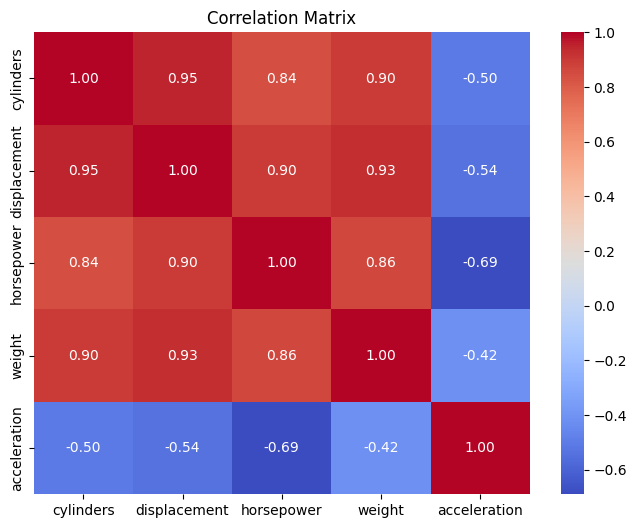

In [44]:
plt.figure(figsize=(8,6))
import seaborn as sns
sns.heatmap(corr_matr,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [45]:
data.drop(['displacement'],axis=1,inplace=True)#dropping displacement as it is highly correlated

C:\Users\Lenova\AppData\Local\Temp\ipykernel_47560\1637175242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['displacement'],axis=1,inplace=True)#dropping displacement as it is highly correlated


In [46]:
data

,mpg,cylinders,horsepower,weight,acceleration
0,18.0,8,130.0,3504.0,12.0
1,15.0,8,165.0,3693.0,11.5
2,18.0,8,150.0,3436.0,11.0
3,16.0,8,150.0,3433.0,12.0
4,17.0,8,140.0,3449.0,10.5
...,...,...,...,...,...
393,27.0,4,86.0,2790.0,15.6
394,44.0,4,52.0,2130.0,24.6
395,32.0,4,84.0,2295.0,11.6
396,28.0,4,79.0,2625.0,18.6


In [47]:
data=data.sample(frac=1,random_state=42).reset_index(drop=True)

In [48]:
X=data.iloc[:,1:]

In [49]:
X

,cylinders,horsepower,weight,acceleration
0,4,69.0,2189.0,18.0
1,4,115.0,2795.0,15.7
2,4,60.0,1800.0,16.4
3,4,70.0,1955.0,20.5
4,4,86.0,2790.0,15.6
...,...,...,...,...
387,8,150.0,3892.0,12.5
388,6,100.0,2789.0,15.0
389,4,85.0,2855.0,17.6
390,4,65.0,2380.0,20.7


In [50]:
y=data.iloc[:,1]

In [51]:
y

0      4
1      4
2      4
3      4
4      4
      ..
387    8
388    6
389    4
390    4
391    8
Name: cylinders, Length: 392, dtype: int64

In [52]:
X.shape[0]

392

In [53]:
split_id=int(0.7*X.shape[0])

In [54]:
X_train=X.iloc[:split_id,:]
X_test=X.iloc[split_id:,:]
y_train=y.iloc[:split_id]
y_test=y.iloc[split_id:]

In [55]:
X_train.shape

(274, 4)

In [56]:
y_train.shape

(274,)

In [57]:
y_test.shape

(118,)

In [58]:
dtree=DecisionTree(criterion='mse')

In [59]:
dtree.fit(X_train,y_train)

Building tree at depth 0
Building tree at depth 1
Building tree at depth 2
Building tree at depth 2
Building tree at depth 3
Building tree at depth 3
Building tree at depth 1
Building tree at depth 2
Building tree at depth 2


In [60]:
y_pred=dtree.predict(X_test)

In [61]:
print("Accuracy of our model: ",accuracy(y_pred,y_test))

Accuracy of our model:  1.0


In [62]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy of sklearn model: ",accuracy_score(y_test,y_pred))

Accuracy of sklearn model:  1.0
